In [1]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics, Distributions, Dierckx
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [2]:
obs10deg = CSV.read("../MPC/observation/obs_10deg_7msEF.csv", DataFrame)
obs20deg= CSV.read("../MPC/observation/obs_20deg_7msEF.csv", DataFrame)
obs35deg = CSV.read("../MPC/observation/obs_35deg_7msEF.csv", DataFrame)

Row,time,u,v,r,x,y,ψ,x1,y1,x2,y2,δ,n_p,X_wind,Y_wind,N_wind,U_W,Ψ_W,X_F,Y_F,N_F
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,1.17,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-3.0,0.0,0.610865,18.95,3.37488,2.38195e-15,-3.3e-15,7.0,3.14159,0.0,0.0,0.0
2,0.25,1.17389,-0.00627179,0.00775535,0.2925,0.0,0.0,3.2925,0.0,-2.7075,3.67394e-16,0.610865,18.95,3.37044,0.0186452,-0.0287452,7.0,3.14159,0.0,0.0,0.0
3,0.5,1.1778,-0.0132645,0.0149755,0.585973,-0.00156795,0.00193884,3.58597,0.00424856,-2.41402,-0.00738446,0.610865,18.95,3.36585,-0.000913102,0.00140773,7.0,3.14159,0.0,0.0,0.0
4,0.75,1.18165,-0.0209172,0.0217439,0.880429,-0.00431318,0.00568271,3.88038,0.0127349,-2.11952,-0.0213612,0.610865,18.95,3.3618,-0.0559984,0.0863308,7.0,3.14159,0.0,0.0,0.0
5,1.0,1.18539,-0.0291726,0.0281286,1.17587,-0.00786366,0.0111187,4.17568,0.0254917,-1.82395,-0.041219,0.610865,18.95,3.36001,-0.144377,0.222556,7.0,3.14159,0.0,0.0,0.0
6,1.25,1.18895,-0.0379756,0.0341848,1.47228,-0.0118614,0.0181508,4.47178,0.042588,-1.52723,-0.0663109,0.610865,18.95,3.36293,-0.264212,0.407152,7.0,3.14159,0.0,0.0,0.0
7,1.5,1.19226,-0.0472727,0.0399568,1.76964,-0.015959,0.026697,4.76857,0.0641225,-1.22929,-0.0960405,0.610865,18.95,3.37341,-0.414042,0.637622,7.0,3.14159,0.0,0.0,0.0
8,1.75,1.19529,-0.0570105,0.0454792,2.06791,-0.0198164,0.0366862,5.06589,0.0902176,-0.93007,-0.12985,0.610865,18.95,3.39444,-0.592776,0.911816,7.0,3.14159,0.0,0.0,0.0
9,2.0,1.19797,-0.0671353,0.0507783,2.36706,-0.0230992,0.048056,5.36359,0.121013,-0.629481,-0.167212,0.610865,18.95,3.42885,-0.799706,1.22784,7.0,3.14159,0.0,0.0,0.0


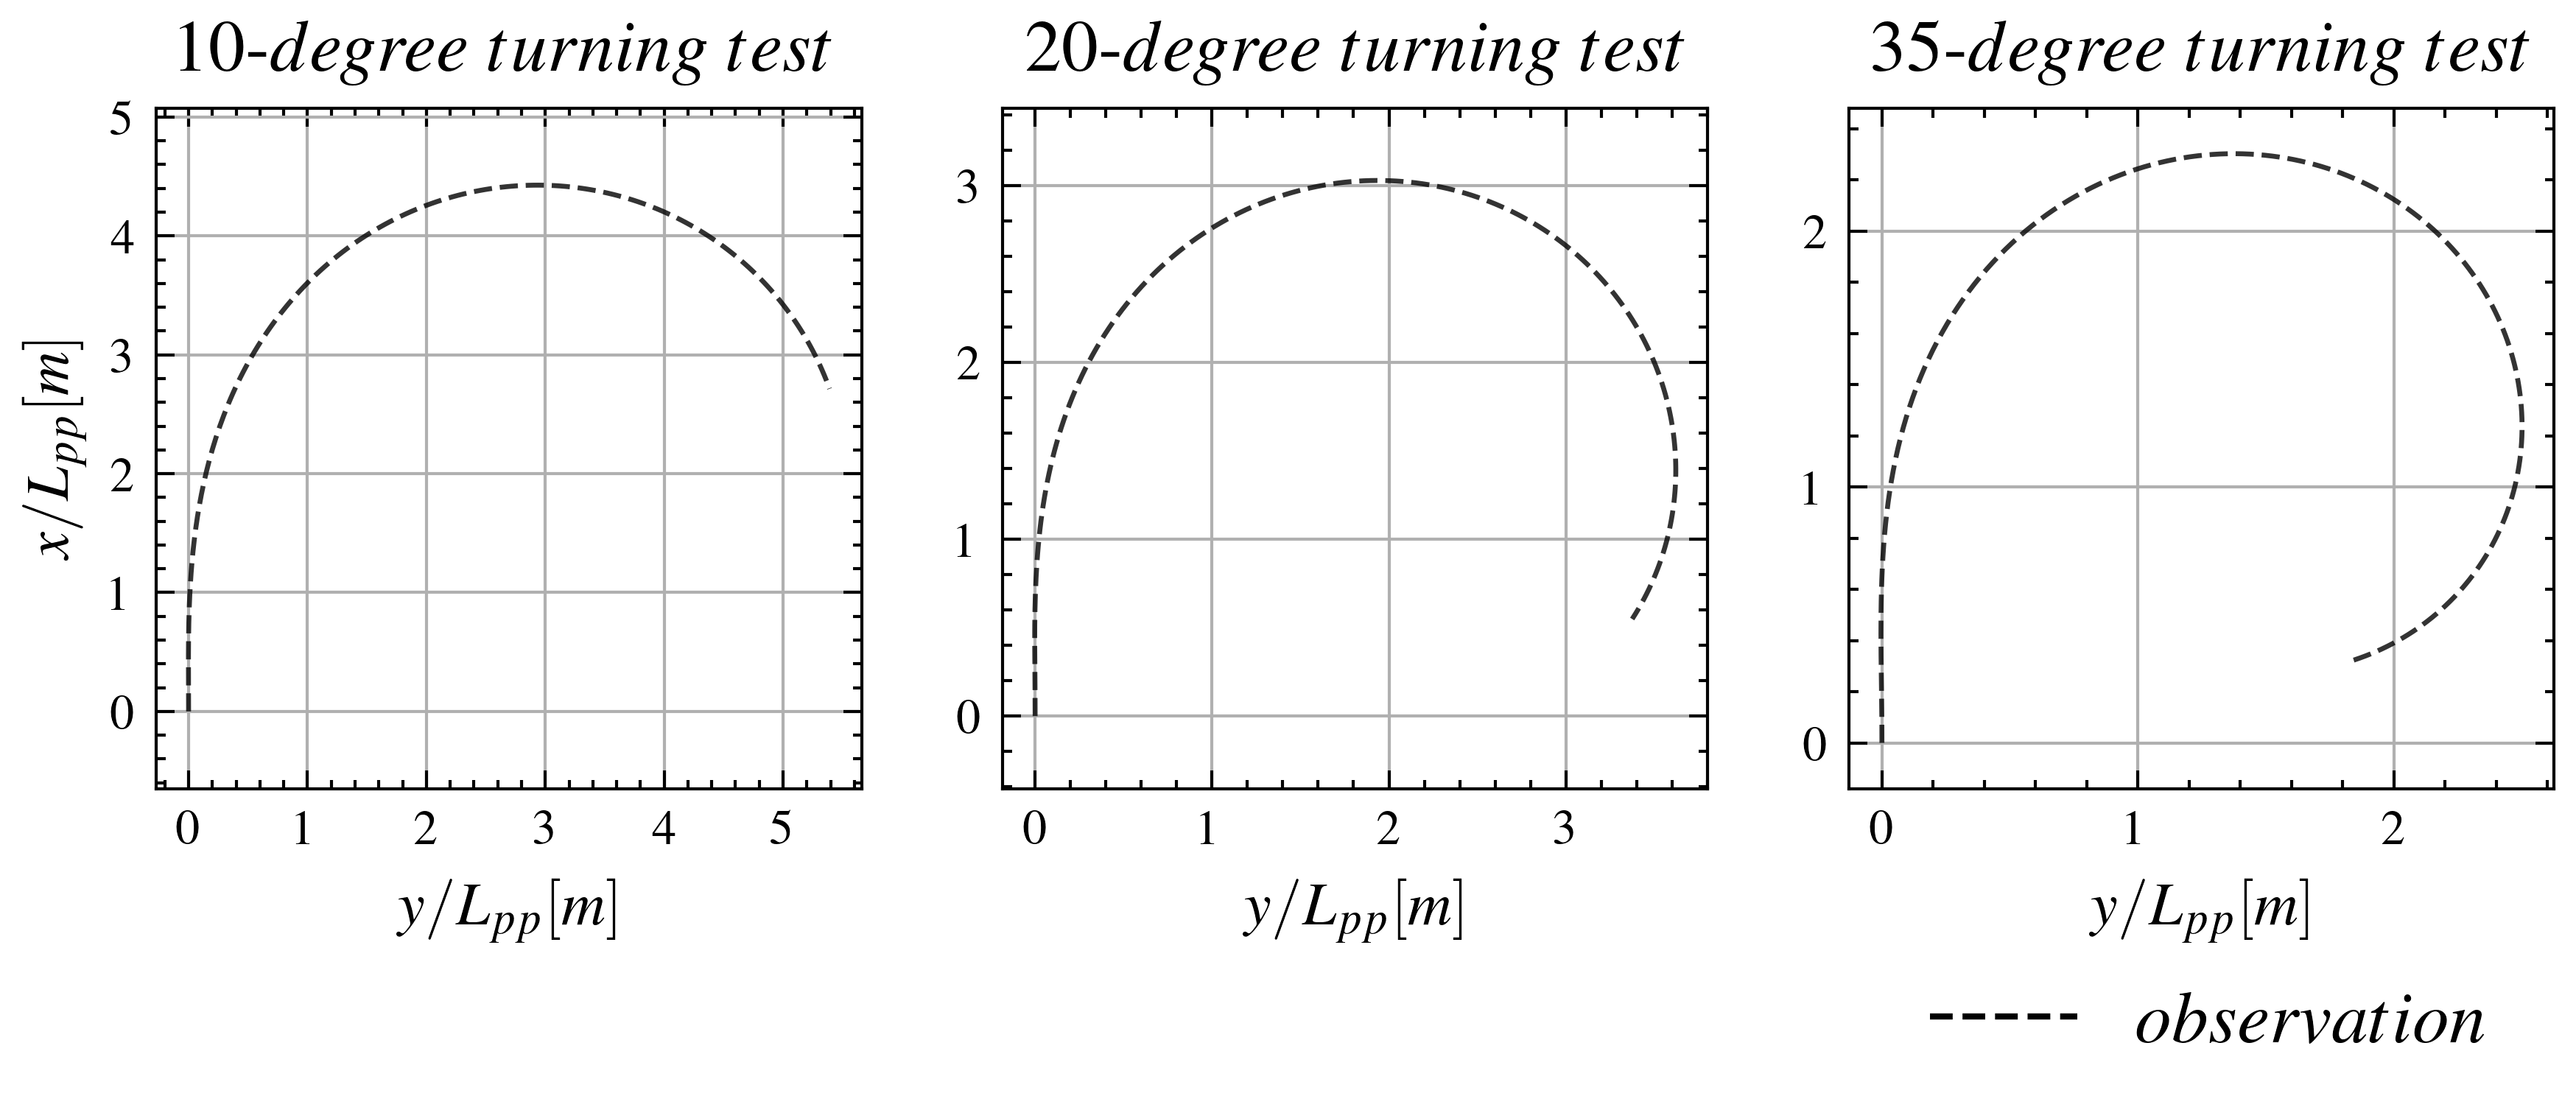

In [3]:
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=12)
ax.plot(obs10deg[1:201,"y"]/7.0, obs10deg[1:201,"x"]/7.0, "--", label="observation", c="k", alpha=0.8, linewidth=0.8)
ax.set_ylabel(L"x/L_{pp}[m]", fontsize=10)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])
ax.axis("equal")
ax.grid()

ax = fig.add_subplot(1, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=12)
ax.plot(obs20deg[1:201,"y"]/7.0, obs20deg[1:201,"x"]/7.0, "--", label="observation", c="k", alpha=0.8, linewidth=0.8)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])
ax.axis("equal")
ax.grid()

ax = fig.add_subplot(1, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=12)
ax.plot(obs35deg[1:201,"y"]/7.0, obs35deg[1:201,"x"]/7.0, "--", c="k", alpha=0.8, linewidth=0.8)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])
ax.axis("equal")
ax.grid()
ax.plot([],[], "--", label=L"observation",  c="black", linewidth=1)
ax.legend(bbox_to_anchor=(1.0, -0.2), fontsize=12, ncol=4)
display(fig)

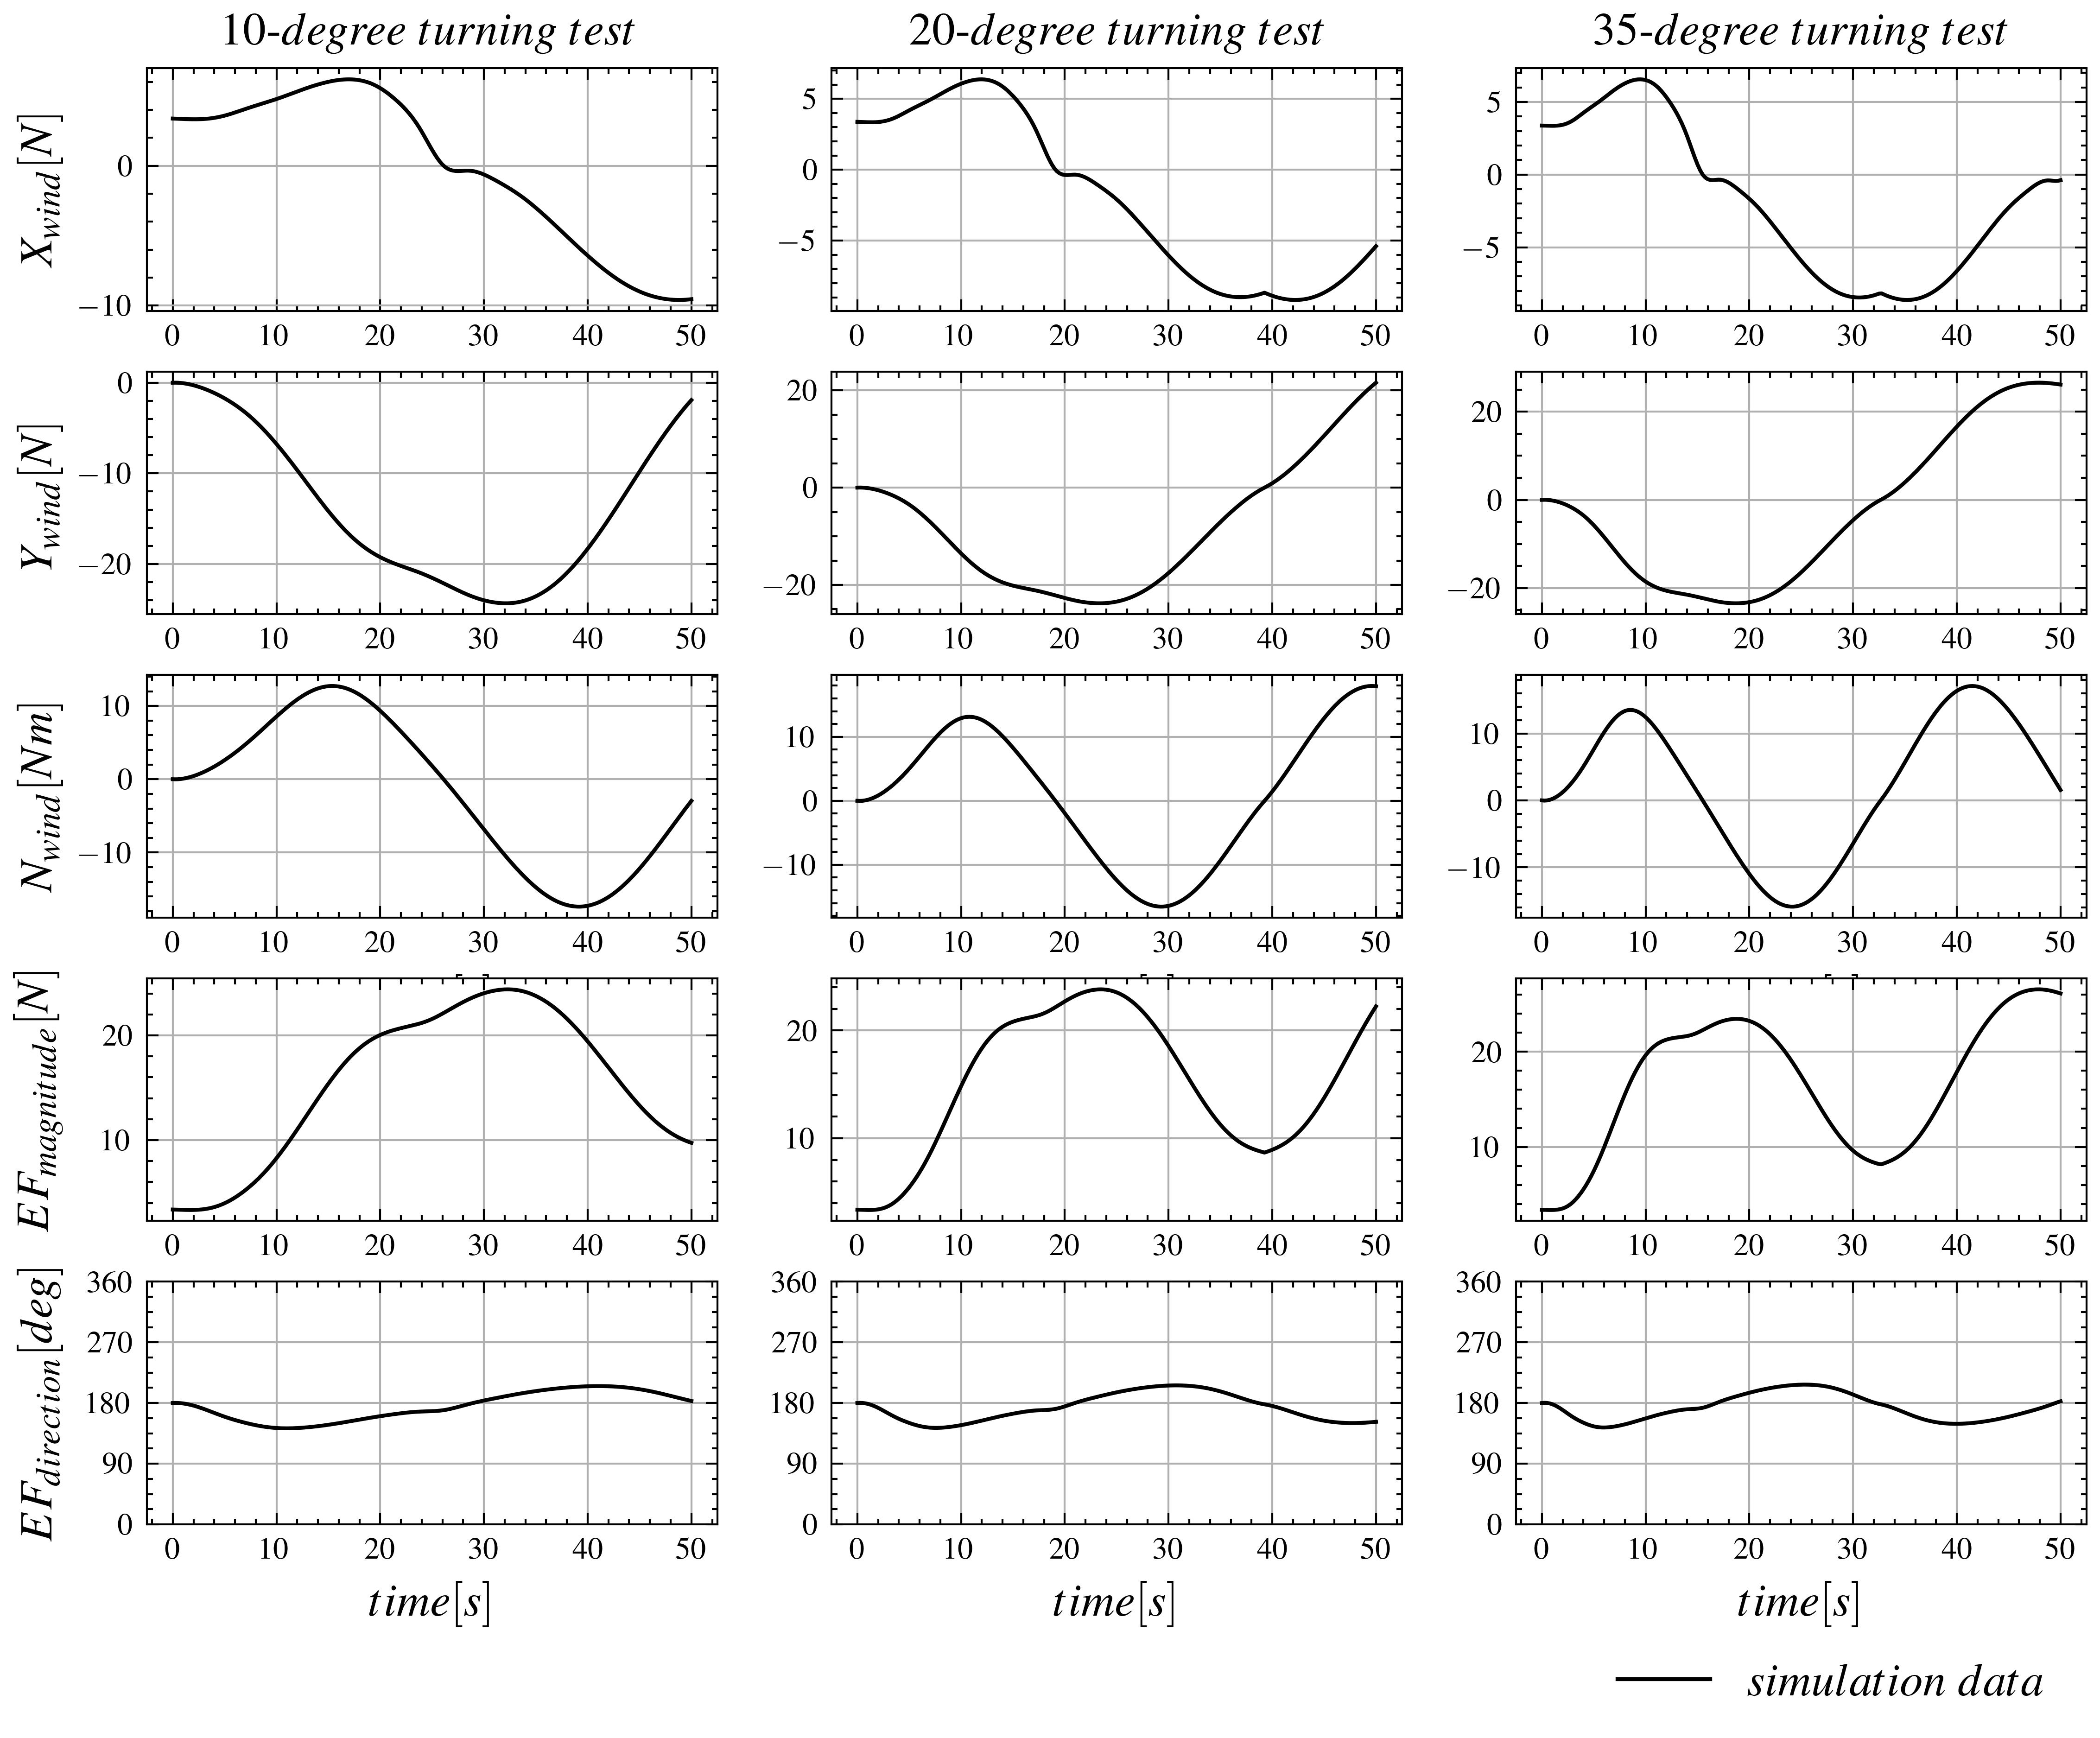

In [4]:
function atan2_2pi(y, x)
    θ = atan(y, x)
    return θ >= 0 ? θ : θ + 2π
end

fig = plt.figure(figsize=(9,6.8))
ax = fig.add_subplot(5, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=12)
ax.plot(obs10deg[1:201,"time"], obs10deg[1:201,"X_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"X_{wind}[N]", fontsize=12)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(5, 3, 4)
ax.plot(obs10deg[1:201,"time"], obs10deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"Y_{wind}[N]", fontsize=12)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(5, 3, 7)
ax.plot(obs10deg[1:201,"time"], obs10deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"N_{wind}[Nm]", fontsize=12)
# 
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(5, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=12)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"X_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(5, 3, 5)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(5, 3, 8)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(5, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=12)
ax.plot(obs35deg[1:201,"time"], obs35deg[1:201,"X_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(5, 3, 6)
ax.plot(obs35deg[1:201,"time"], obs35deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
# 
#ax.set_xlim(-5, 55)
ax.grid()
ax = fig.add_subplot(5, 3, 9)
ax.plot(obs35deg[1:201,"time"], obs35deg[1:201,"N_wind"], "-", c="k", linewidth=1)
# 
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(5, 3, 10)
ax.plot(obs10deg[1:201,"time"], sqrt.(obs10deg[1:201,"X_wind"].^2 .+ obs10deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax.grid()

ax = fig.add_subplot(5, 3, 13)
ax.plot(obs10deg[1:201,"time"], mod.(atan2_2pi.(obs10deg[1:201,"Y_wind"], obs10deg[1:201,"X_wind"]) .- pi .+ obs10deg[1:201, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()
ax.set_ylim(0,360)
ax.set_yticks([0, 90, 180, 270, 360])

ax = fig.add_subplot(5, 3, 11)
ax.plot(obs20deg[1:201,"time"], sqrt.(obs20deg[1:201,"X_wind"].^2 .+ obs20deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(5, 3, 14)
ax.plot(obs20deg[1:201,"time"], mod.(atan2_2pi.(obs20deg[1:201,"Y_wind"], obs20deg[1:201,"X_wind"]) .- pi .+ obs20deg[1:201, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()
ax.set_ylim(0,360)
ax.set_yticks([0, 90, 180, 270, 360])

ax = fig.add_subplot(5, 3, 12)
ax.plot(obs35deg[1:201,"time"], sqrt.(obs35deg[1:201,"X_wind"].^2 .+ obs35deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(5, 3, 15)
ax.plot(obs35deg[1:201,"time"], mod.(atan2_2pi.(obs35deg[1:201,"Y_wind"], obs35deg[1:201,"X_wind"]) .- pi .+ obs35deg[1:201, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()
ax.set_ylim(0,360)
ax.set_yticks([0, 90, 180, 270, 360])
fig.align_labels()
ax.plot([],[], "-", label=L"simulation~data",  c="black", linewidth=1)
ax.legend(bbox_to_anchor=(1.0, -0.4), fontsize=12, ncol=4)
plt.subplots_adjust(hspace=0.25)
display(fig)

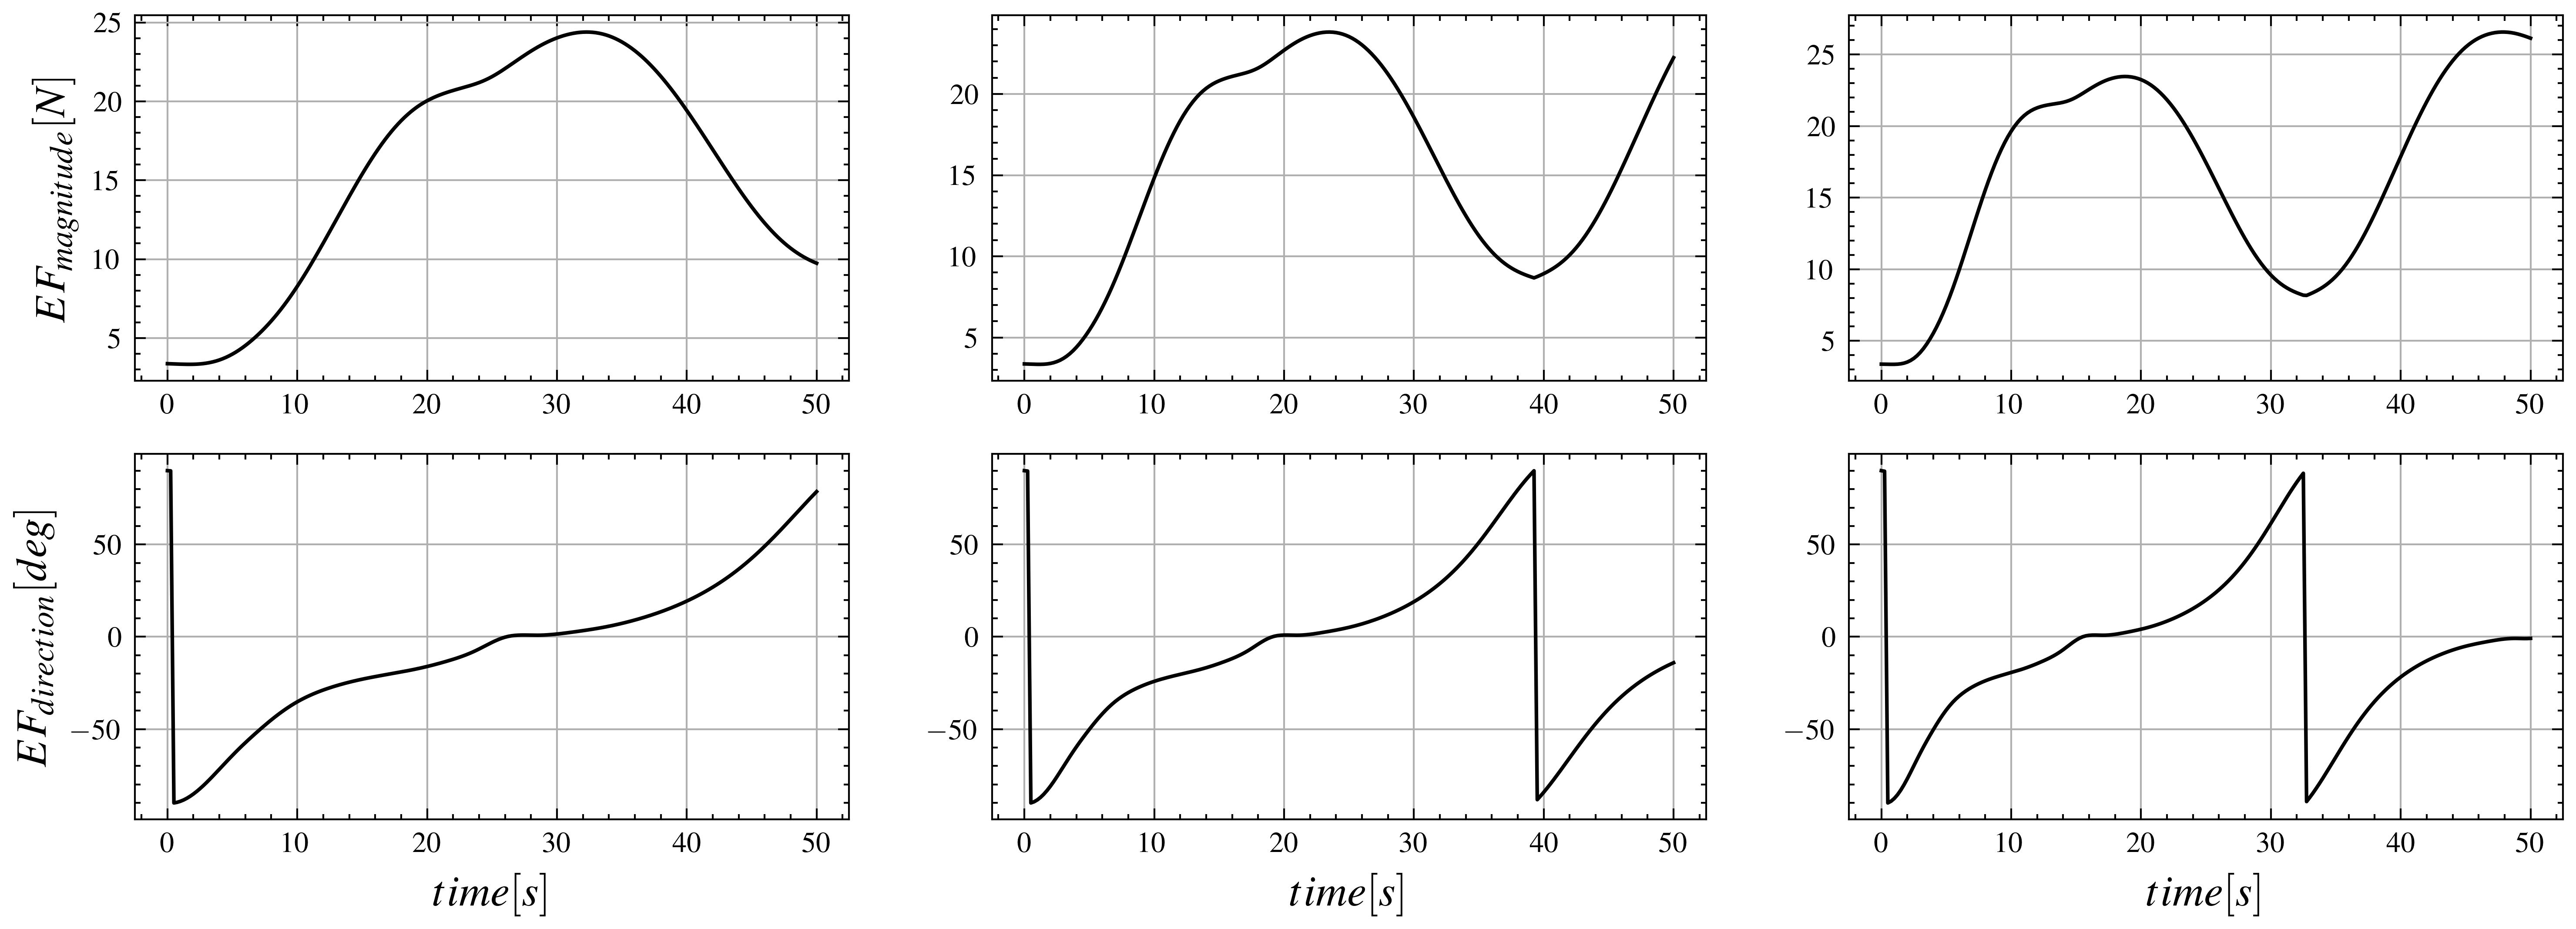

In [5]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(2, 3, 1)
ax.plot(obs10deg[1:201,"time"], sqrt.(obs10deg[1:201,"X_wind"].^2 .+ obs10deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 4)
ax.plot(obs10deg[1:201,"time"], atan.(obs10deg[1:201,"X_wind"]./obs10deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 2)
ax.plot(obs20deg[1:201,"time"], sqrt.(obs20deg[1:201,"X_wind"].^2 .+ obs20deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(2, 3, 5)
ax.plot(obs20deg[1:201,"time"], atan.(obs20deg[1:201,"X_wind"]./obs20deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

ax = fig.add_subplot(2, 3, 3)
ax.plot(obs35deg[1:201,"time"], sqrt.(obs35deg[1:201,"X_wind"].^2 .+ obs35deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()

ax = fig.add_subplot(2, 3, 6)
ax.plot(obs35deg[1:201,"time"], atan.(obs35deg[1:201,"X_wind"]./obs35deg[1:201,"Y_wind"])./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

display(fig)

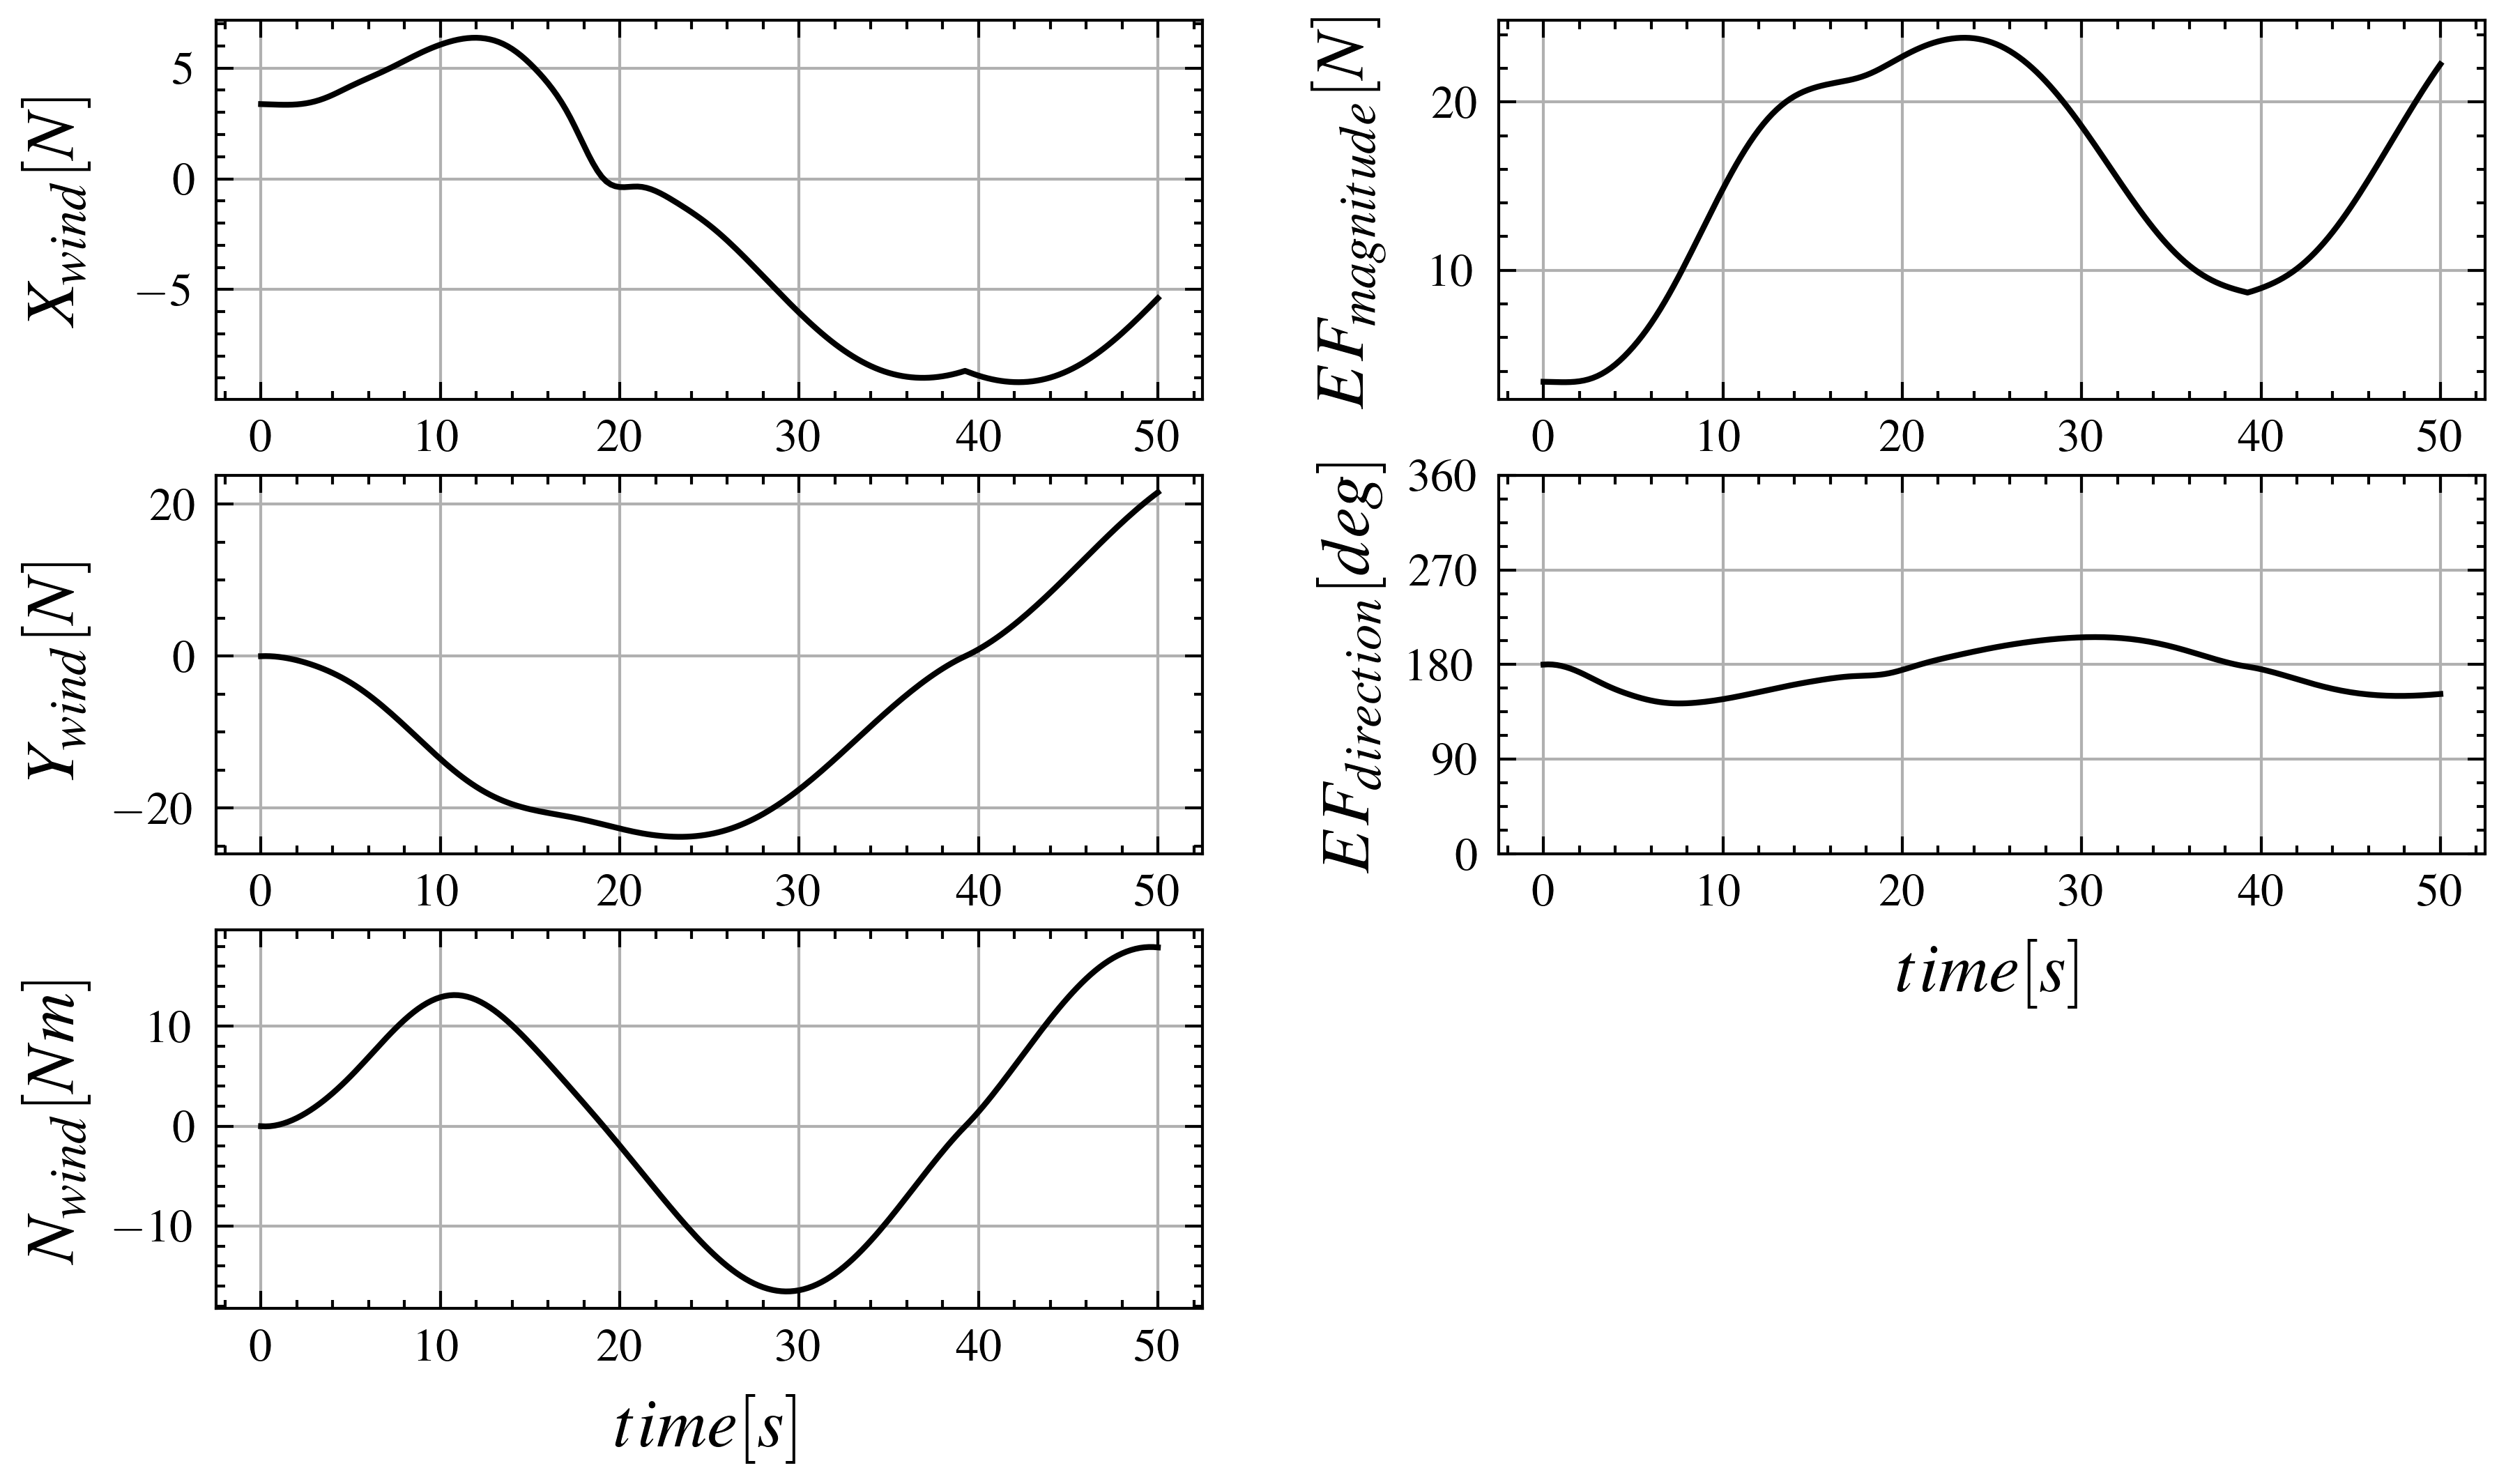

In [6]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(3, 2, 1)
# ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"X_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"X_{wind}[N]", fontsize=12)
ax.grid()
ax = fig.add_subplot(3, 2, 3)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"Y_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"Y_{wind}[N]", fontsize=12)
ax.grid()
ax = fig.add_subplot(3, 2, 5)
ax.plot(obs20deg[1:201,"time"], obs20deg[1:201,"N_wind"], "-", c="k", linewidth=1)
ax.set_ylabel(L"N_{wind}[Nm]", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()

function atan2_2pi(y, x)
    θ = atan(y, x)
    return θ >= 0 ? θ : θ + 2π
end

ax = fig.add_subplot(3, 2, 2)
ax.plot(obs20deg[1:201,"time"], sqrt.(obs20deg[1:201,"X_wind"].^2 .+ obs20deg[1:201,"Y_wind"].^2), "-",  c="k", alpha=1.0, linewidth=1)
ax.grid()
ax.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax = fig.add_subplot(3, 2, 4)
ax.plot(obs20deg[1:201,"time"], mod.((atan2_2pi.(obs20deg[1:201,"Y_wind"], obs20deg[1:201,"X_wind"])) .- 1.0*pi .+ obs20deg[1:201, "ψ"], 2*pi)./pi.*180, "-", c="k", alpha=1, linewidth=1)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax.set_ylim(0,360)
ax.set_yticks([0, 90, 180, 270, 360])
ax.grid()
plt.subplots_adjust(wspace=0.3)
fig.align_labels()
display(fig)

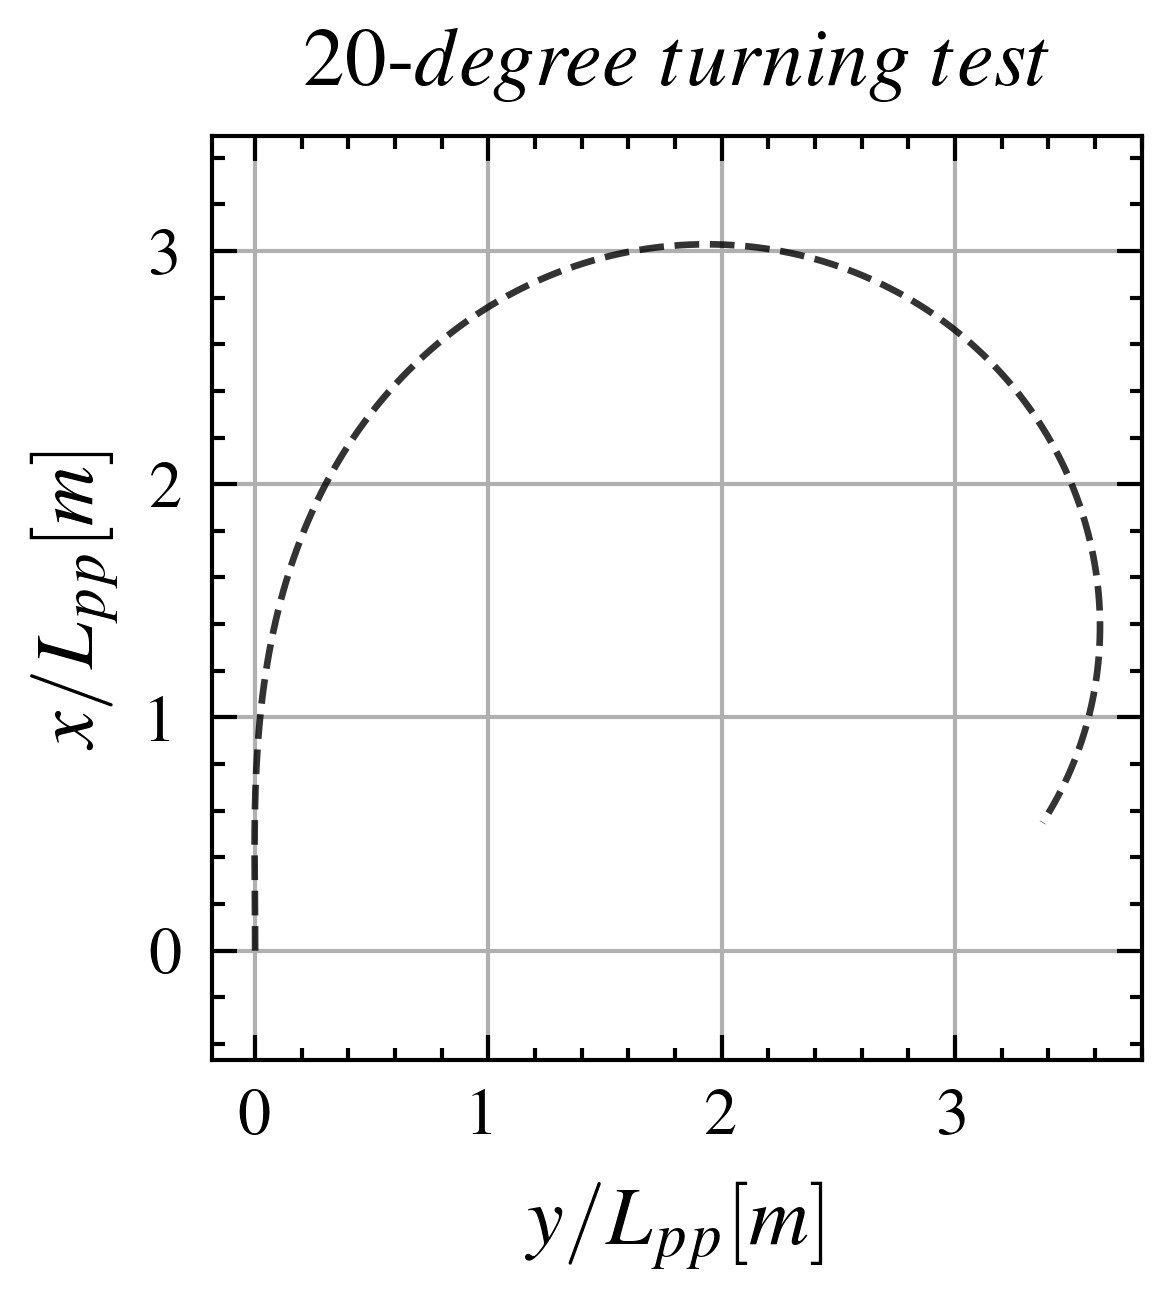

In [7]:
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=10)
ax.plot(obs20deg[1:201,"y"]/7.0, obs20deg[1:201,"x"]/7.0, "--", label="observation", c="k", alpha=0.8, linewidth=0.8)
ax.set_ylabel(L"x/L_{pp}[m]", fontsize=10)
ax.set_xlabel(L"y/L_{pp}[m]", fontsize=10)
# ax.legend(frameon=true, loc="lower right", fontsize=8)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_yticks([0,1,2,3,4,5])
ax.axis("equal")
ax.grid()

display(fig)